# RANDOM FOREST

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## load the Data set
pd.ExcelFile('glass.xlsx').sheet_names

['Description', 'glass']

In [4]:
data = pd.read_excel('glass.xlsx', sheet_name='glass')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
# checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
# checking null Values
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
# handling duplicates
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [11]:
# Statistical Summary

data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


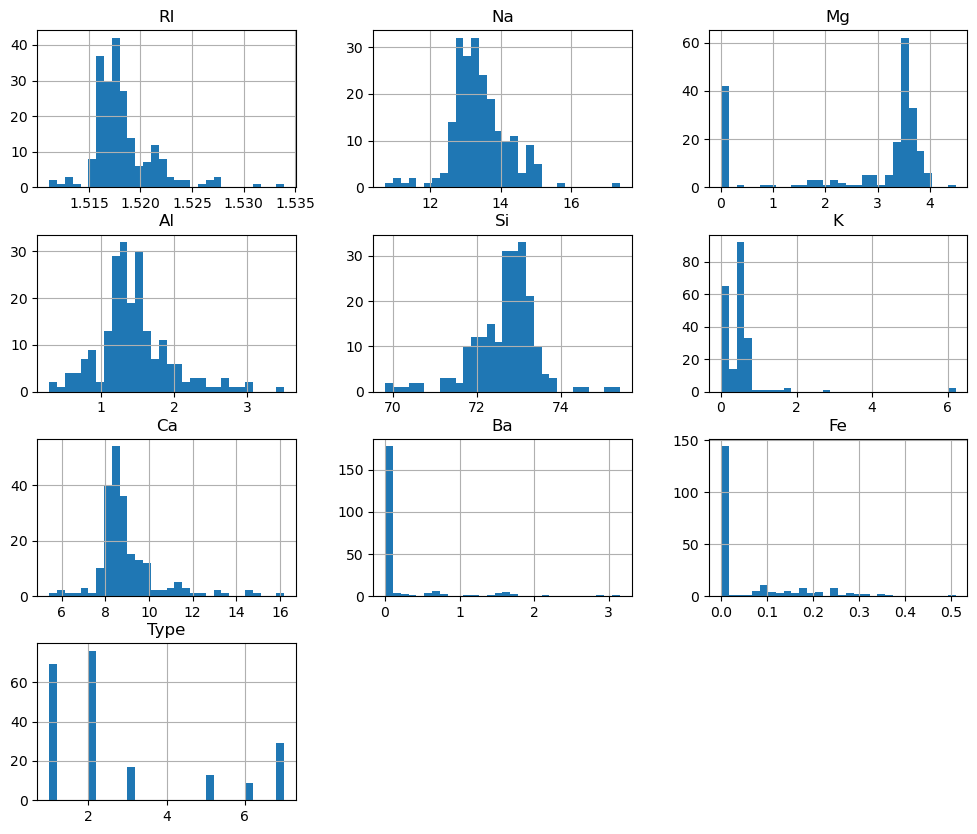

In [22]:
# Distribution of features
data.hist(bins=30, figsize=(12,10))
plt.show()

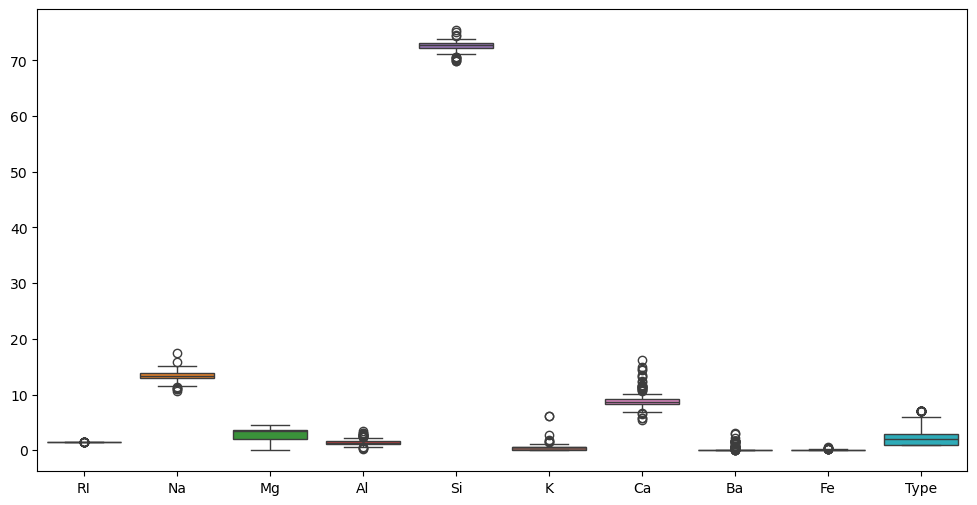

In [25]:
# Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data)
plt.show()

In [26]:
# Correlation
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


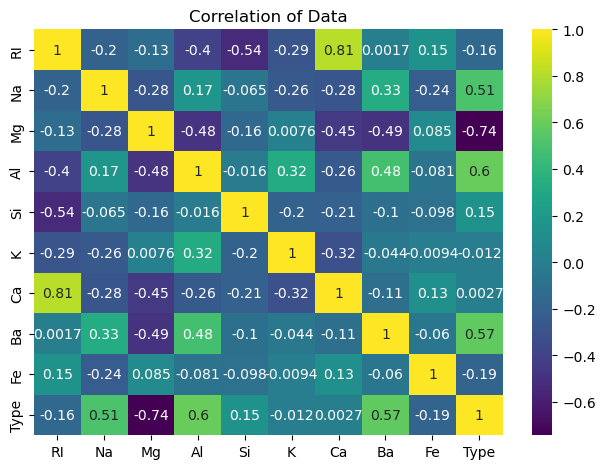

In [28]:
plt.title('Correlation of Data')
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.tight_layout()
plt.show()

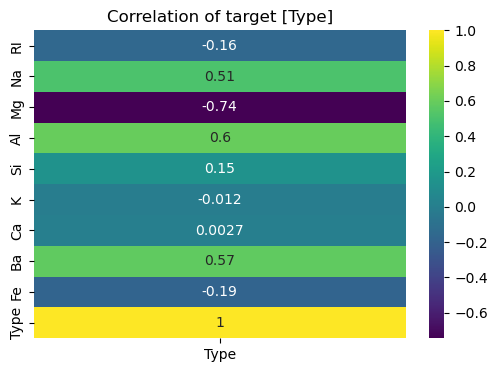

In [35]:
plt.figure(figsize=(6,4))
plt.title('Correlation of target [Type]')
sns.heatmap(data.corr()[['Type']], annot=True, cmap='viridis')
plt.show()

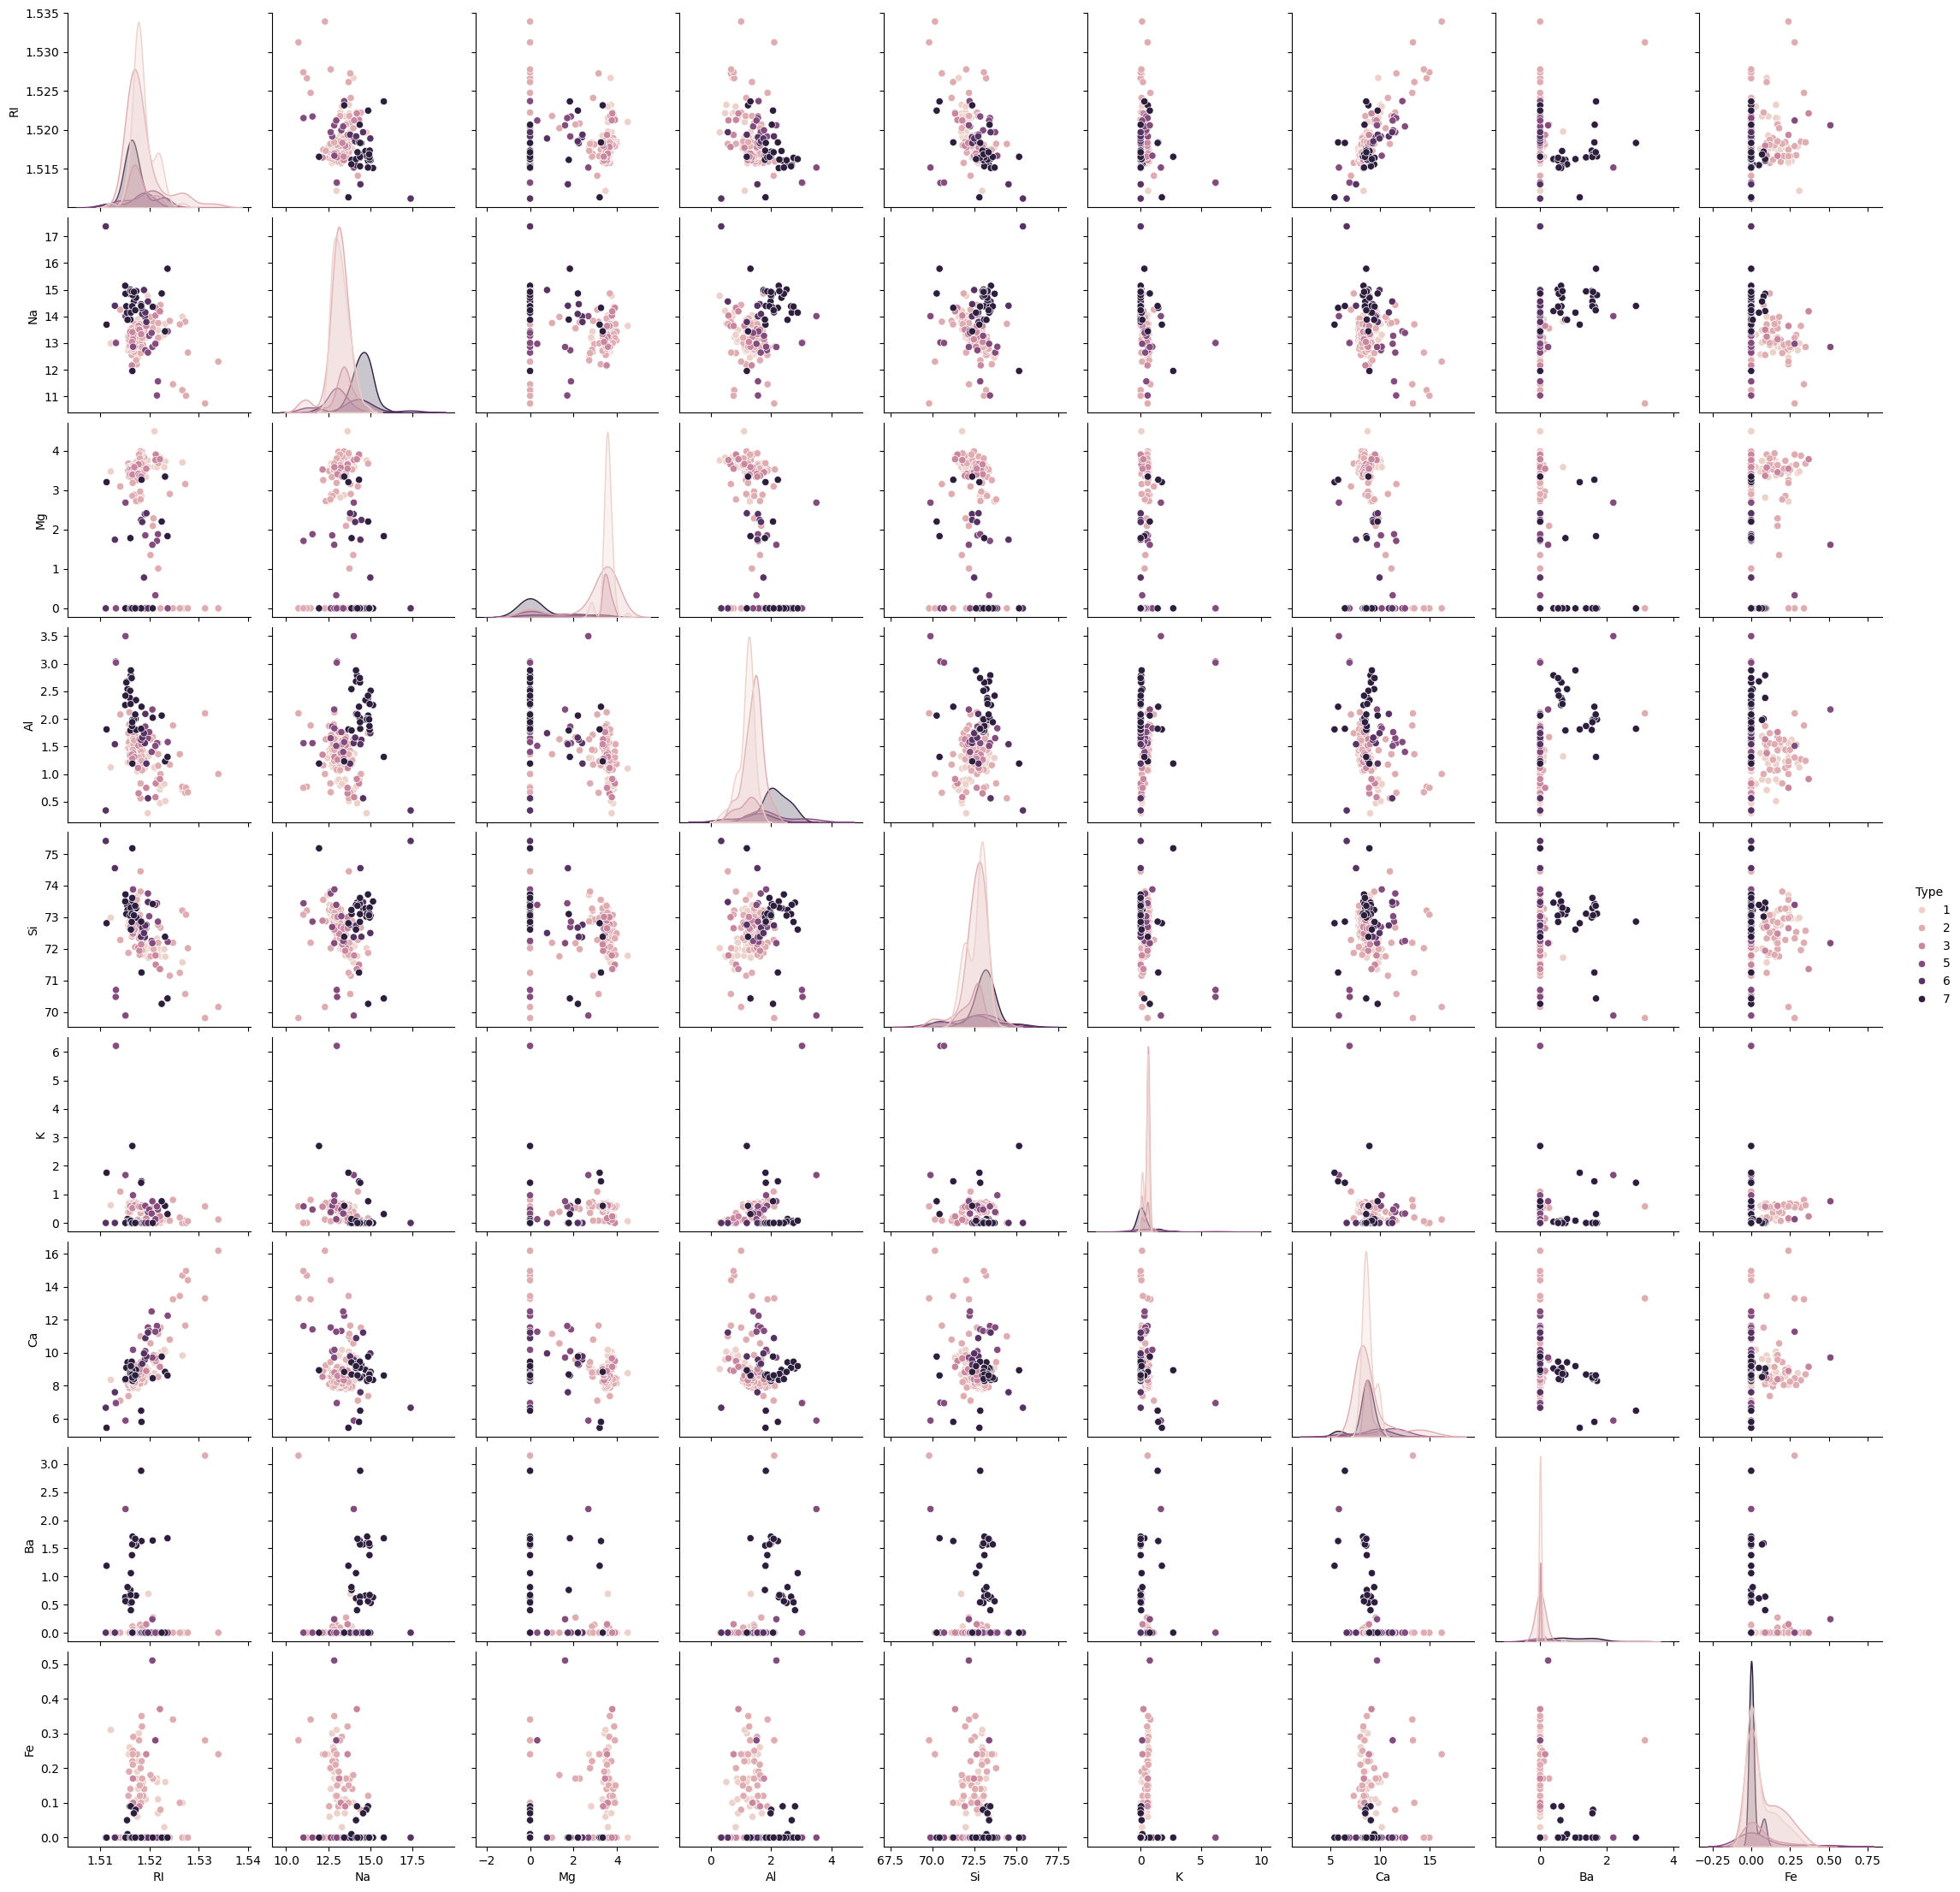

In [37]:
sns.pairplot(data, hue='Type')
plt.show()

### Data Preprocessing

In [38]:
# Separate Features and Target

X = data.drop(columns=['Type'])
y = data['Type']

In [39]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [41]:
y.value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

### Feature Scaling
- Not mandatory for Random Forest
- Applied for consistency and comparison

In [42]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X, columns=X.columns)
SS_X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


### Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(SS_X, y,
                                                         test_size=0.2,
                                                         random_state=42,
                                                         stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 9), (43, 9), (170,), (43,))

### Random Forest Classifier Model fitting

In [71]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
                            random_state=42,
                            class_weight='balanced')
RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluation on Testing Data

In [72]:
y_pred_train = RF.predict(X_train)
y_pred_test = RF.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [74]:
def evaluate_RF(y, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accu = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print('Accuracy Score :', np.round(accu, 3))
    print('Precision Score:', np.round(prec, 3))
    print('Recall Score   :', np.round(recall, 3))
    print('F1 Score       :', np.round(f1, 3))

In [79]:
print('Training score:')
evaluate_RF(y_train, y_pred_train)
print('*'*50)
print('Testing score:')
evaluate_RF(y_test, y_pred_test)

Training score:
Accuracy Score : 1.0
Precision Score: 1.0
Recall Score   : 1.0
F1 Score       : 1.0
**************************************************
Testing score:
Accuracy Score : 0.837
Precision Score: 0.85
Recall Score   : 0.837
F1 Score       : 0.838


In [76]:
print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_pred_train))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_pred_test))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        23

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.80      0.80      0.80        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91   

##### Conclusion:
- Acceptable model, but improvement needed

### Cross-Validation

In [81]:
from sklearn.model_selection import cross_val_score

CV_RF = cross_val_score(RF, SS_X, y, cv=5, scoring='accuracy')

print("CV Scores",CV_RF)
print('Mean CV Scores', CV_RF.mean())

CV Scores [0.62790698 0.6744186  0.6744186  0.5952381  0.80952381]
Mean CV Scores 0.6763012181616833


### GridSearchCV for Random Forest

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [1,5,10,15,20],
    "min_samples_split": [2,3,4,5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid_rf,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [83]:
print("Best RF Params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_


Best RF Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [84]:
y_pred_train_RF = best_rf.predict(X_train)
y_pred_test_RF = best_rf.predict(X_test)

In [85]:
print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_pred_train_RF))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_pred_test_RF))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        23

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.80      0.80      0.80        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91   

## Bagging Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

param_grid_bag = {
    "n_estimators": [50, 100, 200]
}

grid_bag = GridSearchCV(
    BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        random_state=42
    ),
    param_grid_bag,
    cv=5,
    scoring="f1_macro"
)

grid_bag.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid={'n_estimators': [50, 100, 200]}, scoring='f1_macro')

In [90]:
print("Best RF Params:", grid_bag.best_params_)
best_bag = grid_bag.best_estimator_


Best RF Params: {'n_estimators': 200}


In [91]:
y_pred_train_bag = best_bag.predict(X_train)
y_pred_test_bag = best_bag.predict(X_test)

print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_pred_train_bag))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_pred_test_bag))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        23

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.80      0.80      0.80        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92   

### Boosting (AdaBoost)

In [92]:
# GridSearch for AdaBoost
from sklearn.ensemble import AdaBoostClassifier

param_grid_boost = {
    "n_estimators": [50, 100],
    "learning_rate": [0.5, 1.0]
}

grid_boost = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param_grid_boost,
    cv=5,
    scoring="f1_macro"
)

grid_boost.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 1.0],
                         'n_estimators': [50, 100]},
             scoring='f1_macro')

In [93]:
print("Best RF Params:", grid_boost.best_params_)
best_boost = grid_boost.best_estimator_


Best RF Params: {'learning_rate': 1.0, 'n_estimators': 50}


In [94]:
y_pred_train_boost = best_boost.predict(X_train)
y_pred_test_boost = best_boost.predict(X_test)

print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_pred_train_boost))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_pred_test_boost))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           1       0.43      0.49      0.46        55
           2       0.39      0.48      0.43        61
           3       0.50      0.07      0.12        14
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         7
           7       0.90      0.83      0.86        23

    accuracy                           0.45       170
   macro avg       0.37      0.31      0.31       170
weighted avg       0.44      0.45      0.43       170

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           1       0.62      0.57      0.59        14
           2       0.40      0.53      0.46        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.75      0.50      0.60   

## Final Comparison

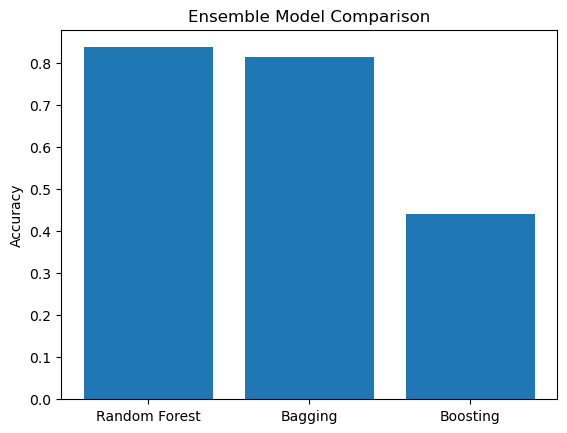

In [95]:
models = ["Random Forest", "Bagging", "Boosting"]
scores = [
    accuracy_score(y_test, y_pred_test_RF),
    accuracy_score(y_test, y_pred_test_bag),
    accuracy_score(y_test, y_pred_test_boost)
]

plt.bar(models, scores)
plt.title("Ensemble Model Comparison")
plt.ylabel("Accuracy")
plt.show()


### Observations

#### Random Forest — BEST
- Handles imbalance
- Robust
- Best CV F1-score
- Least overfitting

#### Bagging
- Stable
- No focus on hard samples

#### Boosting
- Powerful
- Overfits on small data

# Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

Ensemble learning combines multiple models to produce a stronger and more stable model than any single model.
##### Common ensemble methods:
- Bagging
- Boosting
- Random Forest (special case of bagging)

#### BAGGING (Bootstrap Aggregation)

Bagging is an ensemble technique where:
- Multiple models are trained independently
- Each model is trained on a different random subset of the data
- Final prediction is obtained by majority voting

#### BOOSTING
Boosting is an ensemble technique where:
- Models are trained sequentially
- Each new model focuses more on previously misclassified samples
- Combines weak learners to form a strong learner

#### Random Forest 
- Random Forest is an ensemble technique
- Many weak models together make a strong model
- Each decision tree is trained on different data
- Each tree gives its own prediction
-- > Random Forest combines all predictions to get a better final result

- Reduces overfitting
- Makes trees less correlated
- Improves generalization


### Handling Imbalanced Data
- When one class has many more samples than others.
- Ex: Class 1: 70 samples
      Class 6: 9 samples
- Model becomes biased toward majority class

##### Techniques to Handle Imbalance
- Class Weighting (MOST IMPORTANT)
- Stratified Sampling